## Hyperparameter tuning:

It seems like you're discussing various aspects of cross-validation, particularly in the context of machine learning models like Logistic Regression. Here's a summary of your points and some additional insights:

Cross-Validation Techniques: Cross-validation is a technique used to evaluate the performance of a machine learning model. Common methods include:

- LogisticRegressionCV: This is a specific implementation of cross-validation for logistic regression in scikit-learn, where the regularization parameter is automatically selected based on cross-validation scores.

- GridSearchCV: This technique exhaustively searches through a specified subset of hyperparameters for a model.

- RandomizedSearchCV: Similar to GridSearchCV, but it samples a specified number of candidates from a parameter space with a specified distribution.

Splitting Data: Cross-validation involves splitting the training data into multiple subsets. One subset is kept for validation, and the others are used for training. This process is repeated for each subset, ensuring that each data point is used for both training and validation.

Evaluating Model Performance: During each iteration of cross-validation, the model is trained on the training subset and evaluated on the validation subset. The performance metric, such as accuracy, is computed for each iteration.

Determining Final Performance: After all iterations are complete, the performance metric (e.g., accuracy) from each iteration is averaged to obtain a final estimate of the model's performance.

Selecting Hyperparameters: Cross-validation helps in selecting the best set of hyperparameters for the model. Hyperparameters are parameters that are set before the learning process begins (e.g., regularization strength in logistic regression). The combination of hyperparameters that yields the best performance on the validation sets is typically chosen.

Training the Final Model: Once the best hyperparameters are determined through cross-validation, they are used to train the final model on the entire training dataset. This final model can then be used for making predictions on new, unseen data.

Overall, cross-validation is a crucial technique for assessing and improving the performance of machine learning models, especially when it comes to selecting hyperparameters and avoiding overfitting.

** **Selecting Hyperparameters:** Cross-validation helps in selecting the best set of hyperparameters for the model. Hyperparameters are parameters that are set before the learning process begins (e.g., regularization strength in logistic regression). The combination of hyperparameters that yields the best performance on the validation sets is typically chosen.

In [1]:
## Lets see more complex data using make_classification module

# make a prediction with a logistic regression model
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=2, random_state=1)

In [2]:
# perform train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [3]:
pd.DataFrame(X_train) 

,0,1,2,3,4,5,6,7,8,9
0,0.187333,0.866811,-0.125620,1.119682,0.360155,-0.039835,-0.274328,1.615354,-0.900119,0.651941
1,1.293016,0.051337,-0.465809,0.828794,1.109919,-0.029709,-1.327198,-0.186773,-1.515266,-0.582291
2,0.657794,-0.435906,0.333872,-1.618845,0.425744,-1.407251,0.104669,-0.172319,0.421383,0.441738
3,-1.054153,1.260591,-1.639907,0.847286,0.122115,-0.579470,2.278583,0.780838,0.940469,-0.482178
4,0.050414,1.690499,0.401261,1.061855,0.016788,-0.502870,-0.037449,3.224063,-0.542690,1.996916
...,...,...,...,...,...,...,...,...,...,...
795,3.680478,-0.335316,0.219186,-1.865909,2.338346,-2.780282,-2.324106,-0.481476,-1.276089,0.312567
796,-2.628948,0.093512,2.882353,-0.738632,-2.932302,1.251727,0.855254,2.692593,1.564506,3.274848
797,0.424471,1.278813,0.281522,-0.238152,-0.953345,-0.008724,-0.195355,-0.252029,1.769775,0.434975
798,0.211328,-0.721947,-2.203729,-0.982771,2.282316,-2.587650,2.185878,-0.454211,-0.473569,-1.443324


In [4]:
pd.DataFrame(y_train)

,0
0,1
1,1
2,1
3,0
4,1
...,...
795,1
796,0
797,0
798,0


## Hyperparameters

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

**The below are the parameters which are taking default values like penalty="l2", l2 is the default value, we need to find the best value that needs to be consider for penalty, solver, dual, C, etc., parameters so that it will be useful to get good accuracy for the unseen data**

penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None**

### ChatGPT definition for hyperparameters:

Hyperparameters are configuration settings external to the model that can't be directly estimated from the data. They are set prior to the training process and control aspects of the learning algorithm's behavior. Unlike parameters, which are learned during training, hyperparameters are fixed before the training process begins and are not updated during training.

In machine learning algorithms, hyperparameters can significantly affect the performance of the model. They include things like the learning rate in neural networks, the depth of a decision tree, the regularization parameter in logistic regression, and the choice of kernel and regularization in support vector machines (SVMs), among others.

Hyperparameters are typically tuned through techniques like grid search, randomized search, or more sophisticated optimization methods like Bayesian optimization. The goal is to find the combination of hyperparameters that results in the best performance of the model on a validation dataset. Once the optimal hyperparameters are found, the model is trained using these hyperparameters on the entire training dataset to produce the final model.

**The possible values for each parameter:**
    
penalty{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’

dualbool, default=False

Cfloat, default=1.0

solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’

multi_class{‘auto’, ‘ovr’, ‘multinomial’}, default=’auto’

l1_ratiofloat, default=None

etc., etc.,

You can find the possible values for each parameter in the sklearn logistic regression documentation:

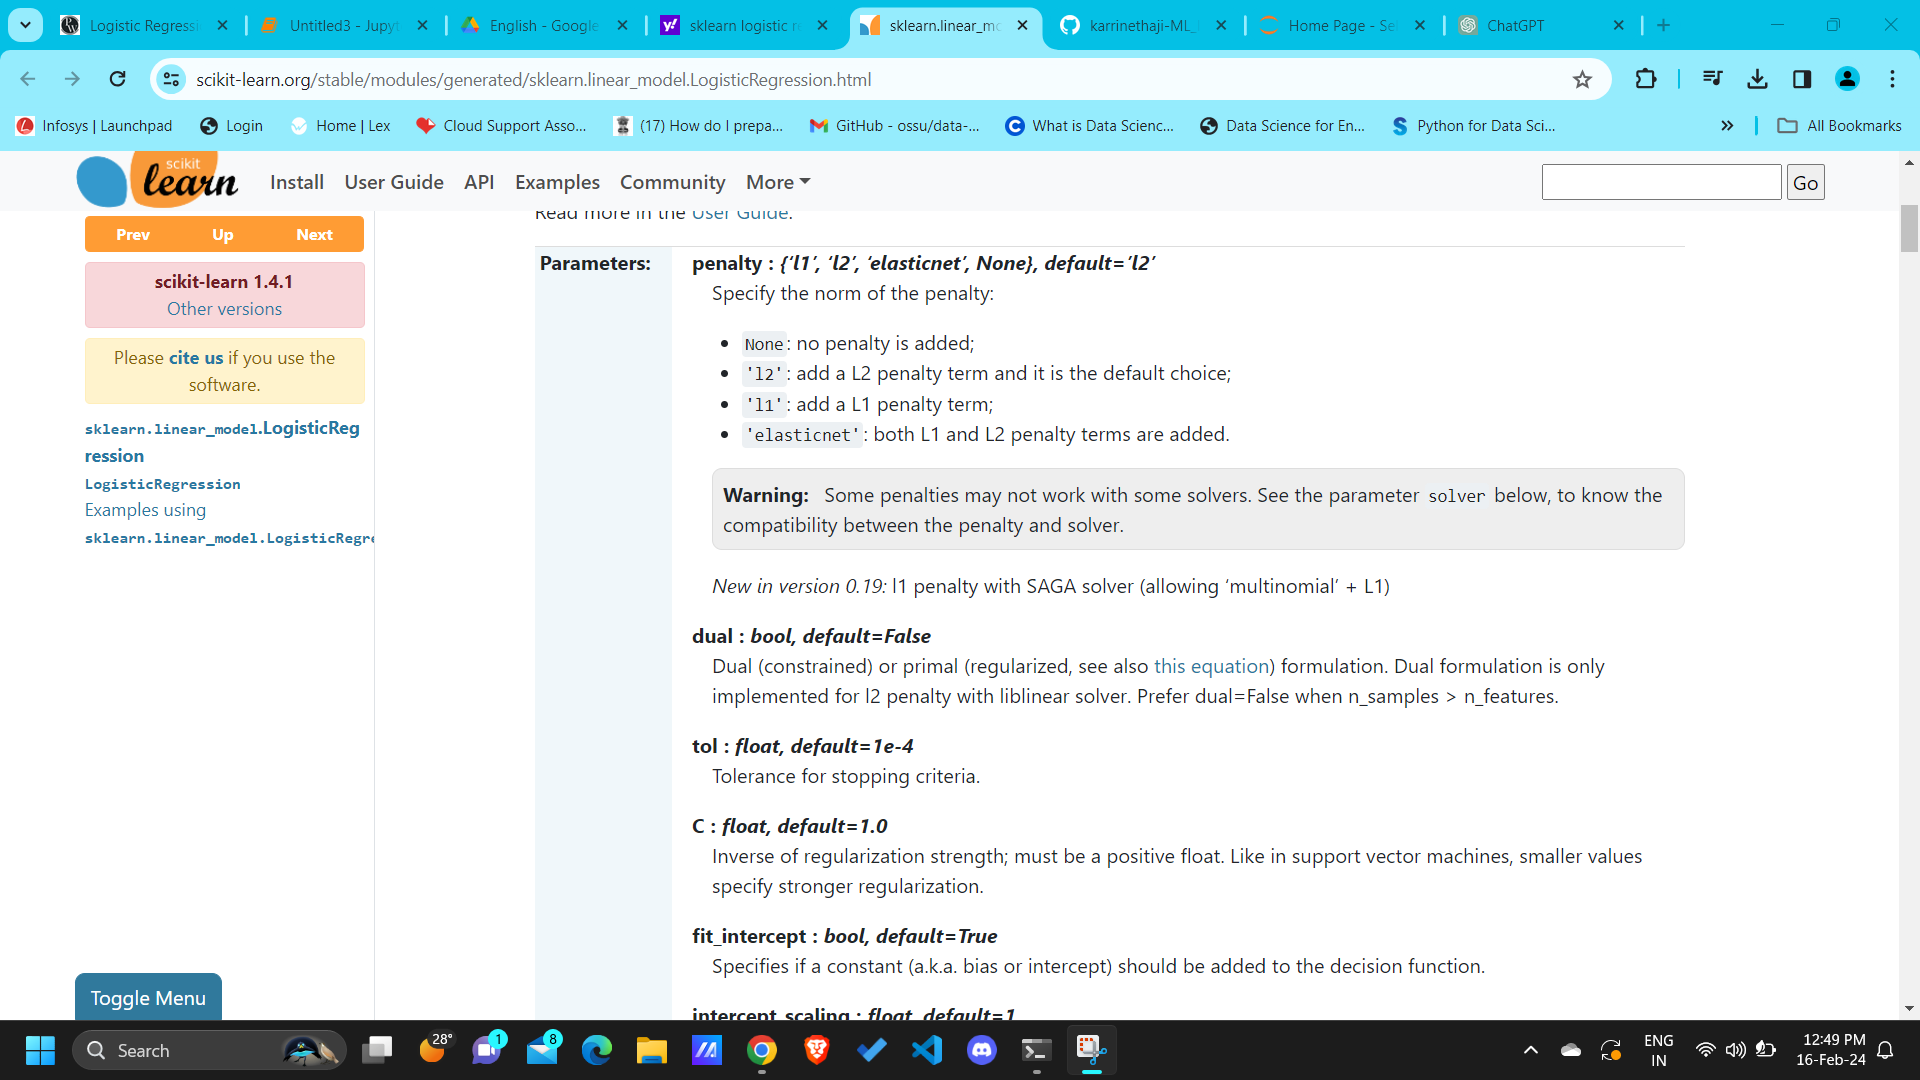

**Documentaion link:** (search as sklearn logistic regression and click on the first link)
    
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
# Let's train the model and perform Hyperparameter tuning using GridSearchCV and RandomizedSearchCV modules

In [6]:
## Model training and Hyper parameter tuning

# class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0,
#                                            pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

In [7]:
## estimator --> the model object to which you want to find the best hyper parameters
## param_grid --> we need to initialize the all the possible values for each paramters
# for ex:for penalty--> {"penalty": (‘l1’, ‘l2’, ‘elasticnet’, 'None')}
# solver:-->  {"solver":(‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’)} 
# C:--> {"C":[0.5, 1.0, 2.0]}  etc., etc.,
## As C is taking float values we need to initialize values in square braces not in the form of tuple

## GridSearchCV

In [8]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [9]:
## Make a dictionary with all possible values for a parameters

# Let's recall we have below parameters available for logistic regression

# class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
# intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, 
# warm_start=False, n_jobs=None, l1_ratio=None)

## we can find the hyper-parameters for the below paramaters

# penalty, dual, tol, C, fit_intercept,intercept_scaling, class_weight, random_state, solver, max_iter, multi_class, verbose, 
# warm_start, n_jobs, l1_ratio

# NOTE: For simplicity let's use some parameters for hyperparameter tuning instead considering all the parameters

## As we already discussed the you can find all possible values for each parameter under sklearn logistic reg documentation.

In [10]:
parameters={"penalty":("l1", 'l2', 'elasticnet'),
           "solver":('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
           "C":[0, 0.5,1,10,20,30]}

# Let's use 3 parameters for our understanding purpose, if you want to provide other parameters then go ahead by adding other parameters

In [11]:
## Create the object of a model

log_reg=LogisticRegression()

In [12]:
## Initialize theGridsearchCV object

GridSearchCV(estimator=log_reg,param_grid=parameters,cv=5)

## cv=5, it will divide data into train and validation dataset and will find accuracy for all the combinations

## Combinations are:

# l1,lbfgs,0
# l1,lbfgs,0.5
# l1,lbfgs,1
# l1,lbfgs,10
# l1,lbfgs,20
# l1,lbfgs,30

# l1, liblinear,0
# l1,liblinear,0.5
# .............
# .............
# .............
# .............

# elasticnet,saga,0
# elasticnet,saga,0.5
# elasticnet, saga, 1
# elasticnet, saga, 10
# elasticnet, saga, 20
# elasticnet, saga, 30

# < The total number combinations will be 108 (penalty: 3 * solver: 6 * C:6 ==> 3*6*6 ==> 108 combination)

# For each and every 108 combinations, the cross validation will be performed for 5 iteration as we mentioned cv=5 and for 
# every iteration it will find the accuracy and after finding accuracies of 5 iteration it will average the accuracy and 
# store and compare with accuracies of remaining combinations. Whatever the combination getting good accuracy then those 
# combination parameters will be selected as "hyper parameters"

# Total number of iterations for cv=5 will be 5*108 = 540 iterations

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.5, 1, 10, 20, 30],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [13]:
clf= GridSearchCV(estimator=log_reg,param_grid=parameters,cv=5)

In [14]:
# Splitting of training data into --> train and validation dataset
# By fitting data, It will divide the dataset into train+validation and it will find the best parameters (hyper parameters)
# as well based on the accuracies.

clf.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0, 0.5, 1, 10, 20, 30],
                         'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga')})

In [15]:
# Let's see what are the best values (hyper parameters) are selected for provided parameters ( panalty, solver, C)

clf.best_params_

# If we use the below parameters while training the logistic regression model, then we will get good accuracy

{'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}

In [16]:
clf.best_estimator_

LogisticRegression(C=0.5)

In [17]:
clf.best_score_ # best accuracy value

0.81125

In [18]:
clf.cv # It will return the cv value

5

In [19]:
## you can find various modules availvble under clf , try to explore the things

In [20]:
### Let's find the accuracy of logistic regression model witout using hyper parameters

## old logistic regression model ==> log_reg

log_reg.fit(X_train, y_train)

y_pred_old= log_reg.predict(X_test)

print("Accuracy score for old logistic regression model (without using hyper parameter values): ", accuracy_score(y_pred_old,y_test))

Accuracy score for old logistic regression model (without using hyper parameter values):  0.79


In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred_old))
print(accuracy_score(y_test,y_pred_old))
print(classification_report(y_test,y_pred_old))

[[78 13]
 [29 80]]
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



In [22]:
## Let's use the above hyper parameters in our logistic regression model to predict the outcomes of unseen data

classifier= LogisticRegression(C=0.5, penalty='l2', solver='lbfgs')

In [23]:
classifier.fit(X_train, y_train)

y_pred_new= classifier.predict(X_test)

print(y_pred_new)

print("Accuracy score for new logistic regression model (after using hyper parameter values): ", accuracy_score(y_pred_new,y_test))

# In this case we got same accuracy without initializing hyper parameters and with initializing hyper parameters but for large
# data, it will vary

[0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 1 1 0 1 0 1 0 1]
Accuracy score for new logistic regression model (after using hyper parameter values):  0.79


In [24]:
classifier.predict_proba(X_test) 

# [0.71574953, 0.28425047]) --> each record represents probability values of each category

# It is saying that 71% probability that it belongs to category 0 and 28.4% probability that it belongs to category 1

# As the probability of 0 is higher (0.715) than the probability of 1 (0.2842), So, 0 will be selcted as output in the 
# above y_pred_new for the first index (correct | verified)

# [0.71574953, 0.28425047], --> 0 will be selected
# [0.19654467, 0.80345533], --> 1 will be selected
# [0.12556133, 0.87443867], --> 1 will be selected
# [0.05151499, 0.94848501], --> 1 will be selected
# [0.8855958 , 0.1144042 ], --> 0 will be selected
# [0.74929821, 0.25070179], --> 0 will be selected

array([[0.71574953, 0.28425047],
       [0.19654467, 0.80345533],
       [0.12556133, 0.87443867],
       [0.05151499, 0.94848501],
       [0.8855958 , 0.1144042 ],
       [0.74929821, 0.25070179],
       [0.97933789, 0.02066211],
       [0.39227108, 0.60772892],
       [0.59862161, 0.40137839],
       [0.3951113 , 0.6048887 ],
       [0.20460915, 0.79539085],
       [0.8006181 , 0.1993819 ],
       [0.86313156, 0.13686844],
       [0.92551724, 0.07448276],
       [0.00136641, 0.99863359],
       [0.04240009, 0.95759991],
       [0.56560101, 0.43439899],
       [0.89144869, 0.10855131],
       [0.29406463, 0.70593537],
       [0.00898815, 0.99101185],
       [0.71719565, 0.28280435],
       [0.5135046 , 0.4864954 ],
       [0.76089638, 0.23910362],
       [0.73014722, 0.26985278],
       [0.10298281, 0.89701719],
       [0.04150604, 0.95849396],
       [0.58037692, 0.41962308],
       [0.00544012, 0.99455988],
       [0.03156933, 0.96843067],
       [0.959908  , 0.040092  ],
       [0.

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(confusion_matrix(y_test,y_pred_new))
print(accuracy_score(y_test,y_pred_new))
print(classification_report(y_test,y_pred_new))

## Here we are getting the same accuracys and confusion matrix as like without hyperparameters. But with the vast data training 
# we can see the difference.

# This is all about GridsearchCV hyperparameter tuning

[[78 13]
 [29 80]]
0.79
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        91
           1       0.86      0.73      0.79       109

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



## RandomizedCV 

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5,n_iter=20)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0, 0.5, 1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet'),
                                        'solver': ('lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga')})

In [28]:
rdm_clf= RandomizedSearchCV(LogisticRegression(),param_distributions=parameters,cv=5,n_iter=20)

In [29]:
rdm_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0, 0.5, 1, 10, 20, 30],
                                        'penalty': ('l1', 'l2', 'elasticnet'),
                                        'solver': ('lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga')})

In [30]:
rdm_clf.best_params_ ## RandomizedsearchCV also picks the same values for hyperparameter

{'solver': 'saga', 'penalty': 'l2', 'C': 0.5}

In [31]:
rdm_clf.predict(X_test)

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1])

In [32]:
rdm_clf.predict_proba(X_test)

array([[0.71570983, 0.28429017],
       [0.19652473, 0.80347527],
       [0.12557511, 0.87442489],
       [0.05152931, 0.94847069],
       [0.88558328, 0.11441672],
       [0.7492574 , 0.2507426 ],
       [0.97933897, 0.02066103],
       [0.3922767 , 0.6077233 ],
       [0.59861898, 0.40138102],
       [0.39504599, 0.60495401],
       [0.20465746, 0.79534254],
       [0.80058109, 0.19941891],
       [0.86313049, 0.13686951],
       [0.92551429, 0.07448571],
       [0.00136692, 0.99863308],
       [0.04240283, 0.95759717],
       [0.56561032, 0.43438968],
       [0.89144519, 0.10855481],
       [0.29408311, 0.70591689],
       [0.00899218, 0.99100782],
       [0.71719996, 0.28280004],
       [0.51348258, 0.48651742],
       [0.76088154, 0.23911846],
       [0.73012832, 0.26987168],
       [0.10298694, 0.89701306],
       [0.04151768, 0.95848232],
       [0.58038178, 0.41961822],
       [0.00544139, 0.99455861],
       [0.03157254, 0.96842746],
       [0.95990908, 0.04009092],
       [0.

In [33]:
#<------------------------------------REFER THE DOCUMENTATION FOR MORE UNDERSTANDING ---------------------------------------->